# **Lab 2 -  Multi-Layer Perceptrons, Backpropagation, and Evaluation**
**Eoin Ocathasaigh - G00417466**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Set random seed for reproducibility
np.random.seed(42)
# Configure matplotlib
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12
print("Libraries loaded successfully!")


Libraries loaded successfully!


## **Exercise 1 - Implementing an MLP Class**
Similar enough in function mainly to last weeks perceptron class. Has some of the exact same methods too just copy pasted over for this one. Two of the most noteable methods include:
- `train`: Which like the name suggests just trains this MLP
- `predict`: Meant to predict values/outputs based on the provided values

In [4]:
class MLP:
    """
    Multi-Layer Perceptron with one hidden layer.
    Uses sigmoid activation and backpropagation.
    """

    def __init__(self, n_inputs, n_hidden, n_outputs, learning_rate=0.1):
        """
        Initialise the MLP.

        Parameters:
        -----------
        n_inputs : int
        Number of input features
        n_hidden : int
        Number of hidden neurons
        n_outputs : int
        Number of output neurons
        learning_rate : float
        Learning rate for weight updates
        """
        self.learning_rate = learning_rate
        # Input to hidden layer weights (weights_ih) and biases (bias_h)
        self.weights_ih = np.random.uniform(-0.5, 0.5, (n_inputs, n_hidden))
        self.bias_h = np.random.uniform(-0.5, 0.5, n_hidden)

        # Hidden to output layer weights (weights_ho) and biases (bias_o)
        # TODO: add code here for weights_ho and bias_o
        ## Hint: see code for weights_ih and bias_h above
        self.weights_ho = np.random.uniform(-0.5, 0.5, (n_hidden, n_outputs))
        self.bias_o = np.random.uniform(-0.5, 0.5, n_outputs)

    def sigmoid(self, x):
        """Sigmoid activation function."""
        # TODO: Implement sigmoid
        ## Hint: see Lab 1
        # Clip to avoid overflow in exp
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def sigmoid_derivative(self, x):
        """Derivative of sigmoid: σ'(x) = σ(x) * (1 - σ(x))."""
        # TODO: Implement sigmoid derivative
        ## Hint: see Lab 1
        s = self.sigmoid(x)
        return s * (1 - s)

    def forward(self, X):
        """
        Forward pass through the network.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_inputs)
        Input data

        Returns:
        --------
        array : Output activations
        """
        # TODO: code this entire method
        ## Hint: see Lab 1
        # Input to hidden
        self.z_h = np.dot(X, self.weights_ih) + self.bias_h
        self.a_h = self.sigmoid(self.z_h)

        # Hidden to output
        self.z_o = np.dot(self.a_h, self.weights_ho) + self.bias_o
        self.a_o = self.sigmoid(self.z_o)

        return self.a_o

    def backward(self, X, y):
        """
        Backward pass (backpropagation).

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_inputs)
        Input data
        y : array-like, shape (n_samples, n_outputs)
        Target outputs
        """
        # TODO: code this entire method
        ## Hint: see Lab 1
        m = X.shape[0] # Number of samples

        # Output layer error
        output_error = y - self.a_o
        output_delta = output_error * self.sigmoid_derivative(self.z_o)

        # Hidden layer error
        hidden_error = np.dot(output_delta, self.weights_ho.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.z_h)

        # Update weights and biases
        self.weights_ho += self.learning_rate * np.dot(self.a_h.T, output_delta) / m
        self.bias_o += self.learning_rate * np.mean(output_delta, axis=0)

        self.weights_ih += self.learning_rate * np.dot(X.T, hidden_delta) / m
        self.bias_h += self.learning_rate * np.mean(hidden_delta, axis=0)

    def train(self, X, y, epochs, verbose=True):
        """
        Train the network.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_inputs)
        Training inputs
        y : array-like, shape (n_samples, n_outputs)
        Training targets
        epochs : int
        Number of training epochs
        verbose : bool
        Print progress if True

        Returns:
        --------
        list : Training loss history
        """
        losses = []

        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Compute loss (Mean Squared Error)
            loss = np.mean((y - output) ** 2)
            losses.append(loss)

            # Backward pass
            self.backward(X, y)

            if verbose and (epoch % 100 == 0 or epoch == epochs - 1):
                print(f"Epoch {epoch}: Loss = {loss:.6f}")

        return losses

    def predict(self, X):
        """
        Make predictions.

        Returns the class with highest output activation.
        """
        output = self.forward(X)
        return np.argmax(output, axis=1)

print("MLP class defined successfully!")

MLP class defined successfully!


## **Exercise 2 - Testing the MLP on XOR**
Before we continue we check to see if it will work on the multi planer XOR from lab 1.

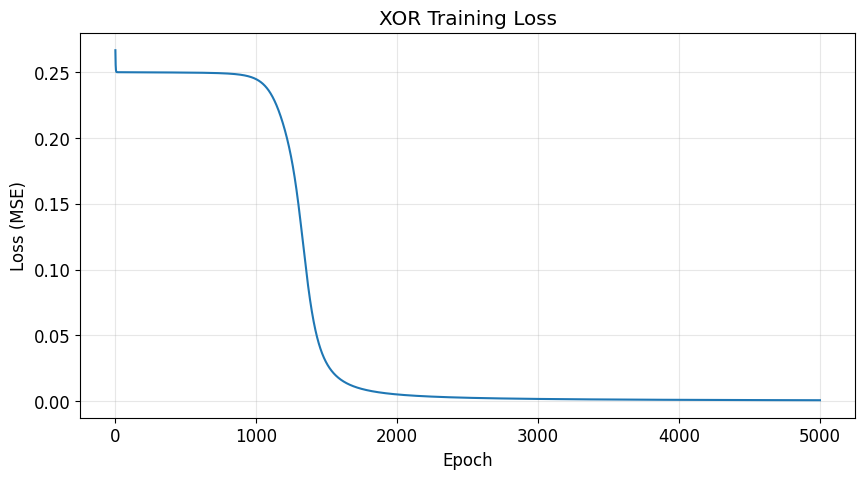


XOR Predictions:
--------------------------------------------------
Input: [0 0] -> Output: 0.0251 -> Rounded: 0 (Expected: 0) ✓
Input: [0 1] -> Output: 0.9708 -> Rounded: 1 (Expected: 1) ✓
Input: [1 0] -> Output: 0.9770 -> Rounded: 1 (Expected: 1) ✓
Input: [1 1] -> Output: 0.0241 -> Rounded: 0 (Expected: 0) ✓


In [7]:
# Define XOR data
# TODO: add code here to define XOR data
## Hint: see Lab 1
X_xor = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
y_xor = np.array([[0],
                  [1],
                  [1],
                  [0]])

# Create and train MLP
np.random.seed(42)
mlp_xor = MLP(n_inputs=2, n_hidden=4, n_outputs=1, learning_rate=2.0)
losses_xor = mlp_xor.train(X_xor, y_xor, epochs=5000, verbose=False)

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(losses_xor)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('XOR Training Loss')
plt.grid(True, alpha=0.3)
plt.show()
# Test predictions
print("\nXOR Predictions:")
print("-" * 50)

for i in range(len(X_xor)):
    output = mlp_xor.forward(X_xor[i:i+1])
    rounded = round(output[0][0])
    correct = "✓" if rounded == y_xor[i][0] else "✗"
    print(f"Input: {X_xor[i]} -> Output: {output[0][0]:.4f} -> Rounded: {rounded} (Expected: {y_xor[i][0]}) {correct}")

## **Exercise 3 - Loading and Preparing the Iris dataset**

The Iris dataset contains 150 samples of iris flowers with:
- 4 features: sepal length, sepal width, petal length, petal width
- 3 classes: Setosa, Versicolor, Virginica

### 3.1 Loading and Exploring the Data

**NOTE:** we get the iris data set from the sklearn import.

We can extract various pieces of information from simply loading in the iris data such as the data itself or the target values

In [8]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
print("Iris Dataset Overview")
print("=" * 50)
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")
print(f"\nClass distribution: {np.bincount(y)}")


Iris Dataset Overview
Features shape: (150, 4)
Target shape: (150,)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

Class distribution: [50 50 50]


### 3.2 Normalising the Data

To ensure a better neural network performance we normalise the data to [0, 1]

In [9]:
# Normalise features to [0, 1]
scaler = MinMaxScaler()
X_normalised = scaler.fit_transform(X)
print("Data Normalisation")
print("=" * 50)
print("Before normalisation:")
print(f" Min: {X.min(axis=0)}")
print(f" Max: {X.max(axis=0)}")
print("\nAfter normalisation:")
print(f" Min: {X_normalised.min(axis=0)}")
print(f" Max: {X_normalised.max(axis=0)}")


Data Normalisation
Before normalisation:
 Min: [4.3 2.  1.  0.1]
 Max: [7.9 4.4 6.9 2.5]

After normalisation:
 Min: [0. 0. 0. 0.]
 Max: [1. 1. 1. 1.]


### 3.3 One Hot Endcode the targets

For multi-class classification with neural networks, we convert class labels to one-hot encoding:
- Class 0 → [1, 0, 0]
- Class 1 → [0, 1, 0]
- Class 2 → [0, 0, 1]

One Hot Encoding is a method for converting categorical variables into a binary format. It creates new columns for each category where 1 means the category is present and 0 means it is not. The primary purpose of One Hot Encoding is to ensure that categorical data can be effectively used in machine learning models.

In [10]:
# One-hot encode targets
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))
print("One-Hot Encoding")
print("=" * 50)
print(f"Original y[:5]: {y[:5]}")
print(f"\nOne-hot y[:5]:")
print(y_onehot[:5])
print(f"\nEncoding: 0 → [1,0,0], 1 → [0,1,0], 2 → [0,0,1]")

One-Hot Encoding
Original y[:5]: [0 0 0 0 0]

One-hot y[:5]:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

Encoding: 0 → [1,0,0], 1 → [0,1,0], 2 → [0,0,1]


### 3.4 Split into Training and Test Sets

In [11]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
 X_normalised, y_onehot, test_size=0.2, random_state=42, stratify=y
)
# Also keep original labels for evaluation
_, _, y_train_labels, y_test_labels = train_test_split(
 X_normalised, y, test_size=0.2, random_state=42, stratify=y
)
print("Train/Test Split")
print("=" * 50)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Train/Test Split
Training set: 120 samples
Test set: 30 samples


## **Exercise 4 - Train the MLP on Iris**

### Creating and Training the Network
We create the network like we did last week, almost like a constructor where we declare a variable and call the MLP init method with the desired values. We then use the train method from the MLP class to train it on the training data we made in the code cell above

In [13]:
np.random.seed(42)
# Create MLP: 4 inputs, 8 hidden, 3 outputs, learning rate = 0.5
# TODO: add code here to create MLP
## Hint: see Exercise 2
#Simple enough, its the method we call to simply create the MLP like a constructor
mlp_iris = MLP(n_inputs=4, n_hidden=8, n_outputs=3, learning_rate=0.5)

print("Training MLP on Iris dataset...")
print("=" * 50)
# Train
losses_iris = mlp_iris.train(X_train, y_train, epochs=1000, verbose=True)

Training MLP on Iris dataset...
Epoch 0: Loss = 0.245520
Epoch 100: Loss = 0.212343
Epoch 200: Loss = 0.192939
Epoch 300: Loss = 0.160408
Epoch 400: Loss = 0.134717
Epoch 500: Loss = 0.121064
Epoch 600: Loss = 0.113445
Epoch 700: Loss = 0.108393
Epoch 800: Loss = 0.104507
Epoch 900: Loss = 0.101203
Epoch 999: Loss = 0.098243


### Plot Training Loss
This helps us visualise how the loss decreases during training

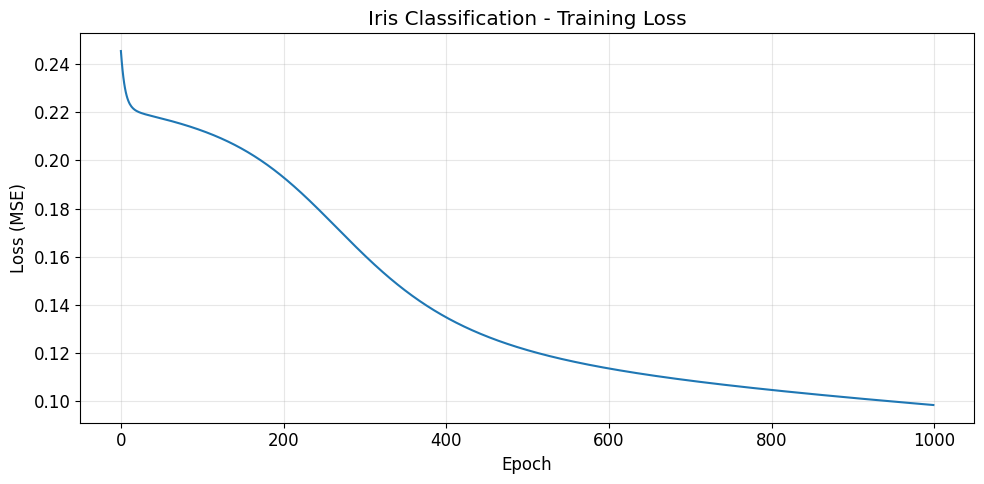

Figure saved as 'iris_training_loss.png'


In [14]:
plt.figure(figsize=(10, 5))
plt.plot(losses_iris)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Iris Classification - Training Loss')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('iris_training_loss.png', dpi=150)
plt.show()
print("Figure saved as 'iris_training_loss.png'")

### Evaluating on Test Set
This next section is pretty simple, we use the validation data we split earlier with the test data and compare it against the predicted value of the iris trained mlp method

In [15]:
# Predictions
y_pred = mlp_iris.predict(X_test)
y_true = np.argmax(y_test, axis=1)
# Accuracy
accuracy = np.mean(y_pred == y_true)
print("Test Set Evaluation")
print("=" * 50)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Correct predictions: {np.sum(y_pred == y_true)}/{len(y_true)}")

Test Set Evaluation
Test Accuracy: 80.00%
Correct predictions: 24/30
